In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns


In [2]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0299-09.hi.nc')
plotvar = data.variables['hi'][0,:,:]
lont = data.variables['lont_bounds'][:,:,0]
latt = data.variables['latt_bounds'][:,:,0]

In [3]:
lont = lont[:,:]
latt = latt[:,:]
plotvar = plotvar[:,:]

In [4]:
lont2 = lont[200:,1200]
latt2 = latt[200:,1200]

In [11]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,30,50,60,70,80,90,100,130,150,170,190,210,220,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [0.4,0.5,0.55,0.6,0.65,0.7,0.8,0.9,1,1.1,1.2,1.3]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


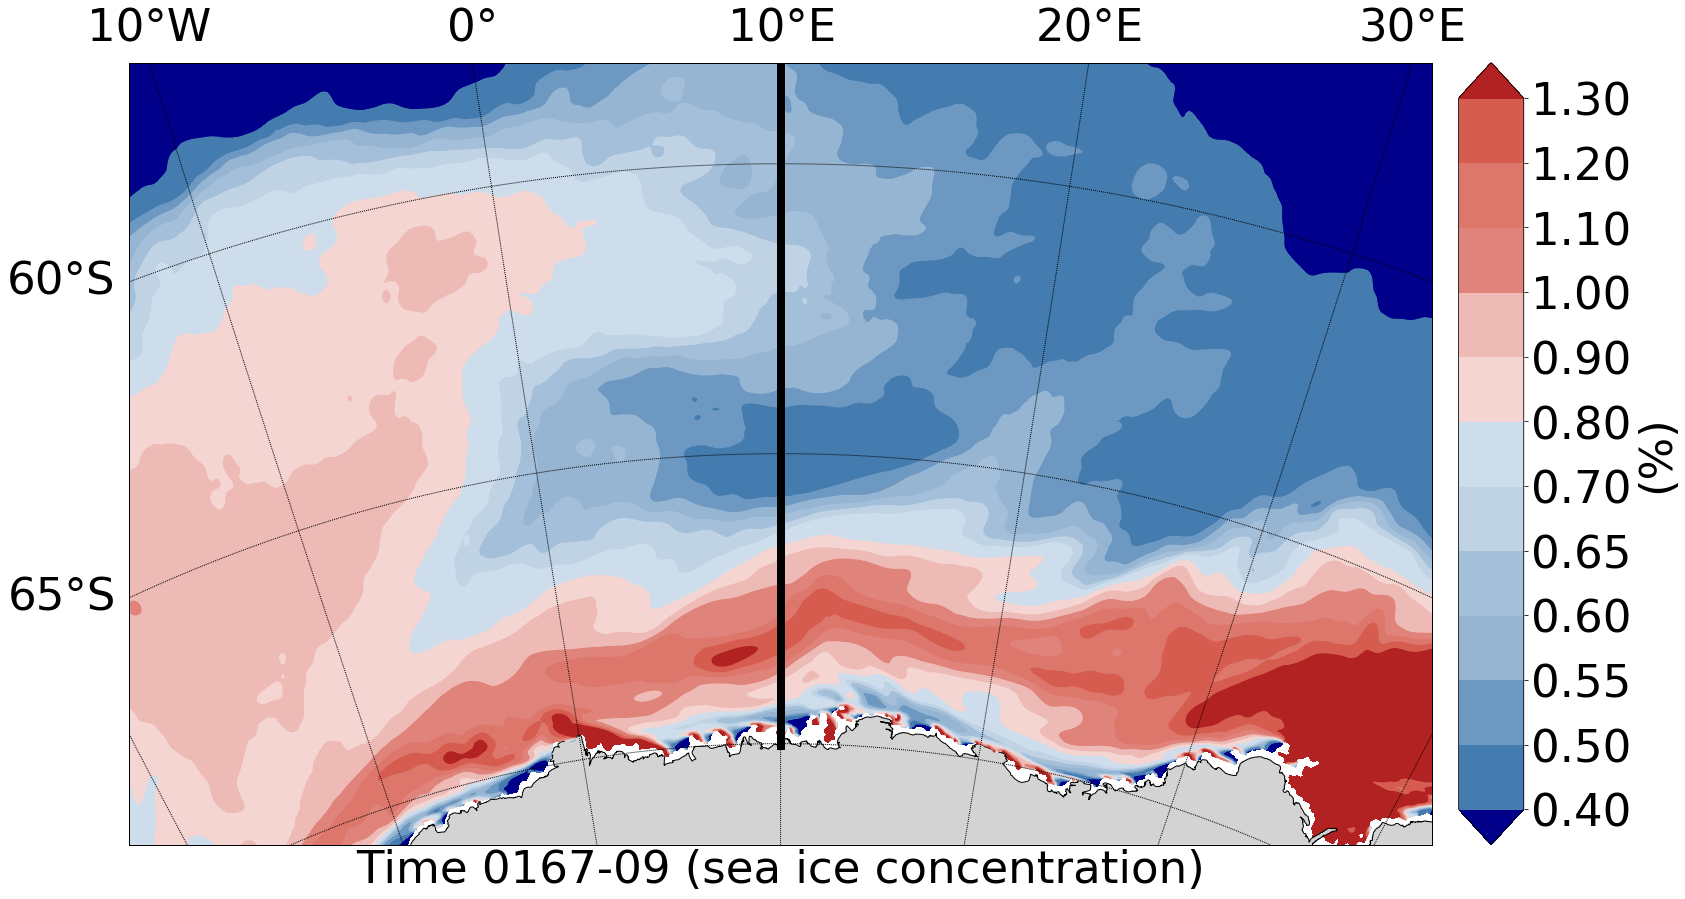

In [13]:
plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'45'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 10,area_thresh = 100,\
              #width = 10000000,height = 15000000,resolution ='h')     
              width = 2500000,height = 1500000,resolution ='h') 
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,plotvar,range(0,100),cmap = new_cmap,norm =norm,levels = nice_levels,extend='both')
CP.cmap.set_over('firebrick')
CP.cmap.set_under('darkblue')
x2,y2=map(lont2,latt2)
map.plot(x2,y2,'black',linewidth=8)

map.contour(x,y,plotvar,range(0,100),cmap = new_cmap,norm =norm,levels = nice_levels)
cbar =map.colorbar(CP,ticks = nice_levels)
cbar.ax.tick_params(labelsize=45) 
cbar.set_label('(%)', **my_font)
#plt.suptitle("TIME 0119-10",**my_font)
plt.xlabel("Time 0167-09 (sea ice concentration)",**my_font)
plt.savefig("aicearea299-09.png",bbox_inches='tight')